## K-means
K-menas is a simple partition clustering method.

http://nbviewer.jupyter.org/github/flothesof/posts/blob/master/20150717_Kmeans.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# vstack(): Stack arrays in sequence vertically (row wise).
# Take a sequence of arrays and stack them vertically to make a single array. 
points = np.vstack([np.random.randn(150, 2) * 0.75 + np.array([1, 0]),
                    np.random.randn(50, 2) * 0.25 + np.array([-0.5, 0.5]),
                    np.random.randn(50, 2) * 0.5 + np.array([-0.5, -0.5])])
print(points)

[[  1.37687209e+00  -1.00835667e+00]
 [  8.90375111e-01   2.77632921e-01]
 [  2.92033528e+00   5.94458786e-01]
 [  1.40500450e+00  -1.38369565e+00]
 [  1.03990452e+00   4.23901233e-02]
 [  7.18520897e-02  -3.45280003e-01]
 [  2.97973572e-01  -4.96335531e-01]
 [  4.59880804e-02  -4.67831693e-01]
 [  9.22294943e-01   5.56113646e-01]
 [  1.05517212e+00  -3.96770072e-01]
 [  7.93566671e-01   1.02169472e+00]
 [  8.23627394e-01  -1.04816914e+00]
 [  2.65520259e-01  -9.71179336e-01]
 [ -6.99029039e-02   1.86893246e-01]
 [ -8.26310156e-02   8.53641617e-01]
 [  2.06257597e+00  -1.43541482e+00]
 [  3.03595781e-01  -1.28483544e+00]
 [  1.19279794e+00  -4.77794295e-01]
 [  7.03717475e-01   2.08649449e-01]
 [  1.87355866e+00   2.35354853e-01]
 [  1.50409479e+00  -4.56713124e-01]
 [  1.13008463e+00  -8.23757797e-01]
 [  3.13764228e+00  -8.52147311e-01]
 [  1.41544183e+00   6.17393138e-01]
 [  1.85521047e-02   1.46594488e+00]
 [  2.21685933e-02   1.63137823e-01]
 [  1.12050282e+00  -2.66276134e-01]
 

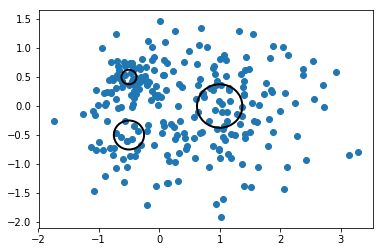

In [3]:
# Plot random generated data
# scatter(x, y)
plt.scatter(points[:, 0], points[:, 1])

# plot hidden centers
ax = plt.gca() # The function gca() returns the current axes.
ax.add_artist(plt.Circle(np.array([1, 0]), 0.75/2, fill=False, lw=2))
ax.add_artist(plt.Circle(np.array([-0.5, 0.5]), 0.25/2, fill=False, lw=2))
ax.add_artist(plt.Circle(np.array([-0.5, -0.5]), 0.5/2, fill=False, lw=2))

In [4]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [5]:
# Try it out
initialize_centroids(points, 3)

array([[ 0.9952578 , -0.75053818],
       [-0.78672185,  0.48369472],
       [ 0.65220525,  1.05734101]])

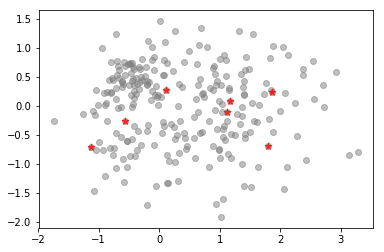

In [6]:
plt.scatter(points[:, 0], points[:, 1], c='grey', alpha=0.5)
centroids = initialize_centroids(points, 7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50, marker='*', alpha=0.7)

# https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter

In [7]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2)) # broadcast
    return np.argmin(distances, axis=0) # Returns the indices of the minimum values along an axis.

In [8]:
# broadcast
print(points.shape)
print(centroids[:, np.newaxis].shape)
print((points - centroids[:, np.newaxis]).shape)
print(points - centroids[:, np.newaxis])

(250, 2)
(7, 1, 2)
(7, 250, 2)
[[[-0.42983378 -0.31329791]
  [-0.91633076  0.97269168]
  [ 1.11362941  1.28951754]
  ..., 
  [-2.52899803 -0.38031143]
  [-2.37368734  0.44500032]
  [-3.54081258  0.42873127]]

 [[ 1.26791636 -1.29089122]
  [ 0.78141937 -0.00490163]
  [ 2.81137954  0.31192423]
  ..., 
  [-0.8312479  -1.35790474]
  [-0.67593721 -0.53259299]
  [-1.84306245 -0.54886203]]

 [[-0.49668657 -1.24371152]
  [-0.98318355  0.04227807]
  [ 1.04677661  0.35910393]
  ..., 
  [-2.59585083 -1.31072504]
  [-2.44054013 -0.48541329]
  [-3.60766538 -0.50168233]]

 ..., 
 [[ 2.51273583 -0.30555544]
  [ 2.02623884  0.98043414]
  [ 4.05619901  1.29726001]
  ..., 
  [ 0.41357157 -0.37256897]
  [ 0.56888226  0.45274278]
  [-0.59824298  0.43647374]]

 [[ 0.26165562 -0.91290607]
  [-0.22484136  0.37308351]
  [ 1.8051188   0.68990938]
  ..., 
  [-1.83750864 -0.97991959]
  [-1.68219794 -0.15460785]
  [-2.84932319 -0.17087689]]

 [[ 0.20973462 -1.09119598]
  [-0.27676237  0.19479361]
  [ 1.7531978   

In [9]:
# Try
c = initialize_centroids(points, 3)
cc = closest_centroid(points, c)
print(c)
print(cc)

[[ 2.11915294 -1.04979034]
 [ 0.94139007 -1.69481661]
 [ 1.50409479 -0.45671312]]
[2 2 2 1 2 2 2 2 2 2 2 1 1 2 2 0 1 2 2 2 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 1 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 2 2 2 0 2 2 2 2 2
 1 2 2 2 2 1 2 2 2 1 2 2 1 2 2 2 2 2 2 1 0 2 2 2 2 2 2 2 2 2 1 0 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 1 1 2 2 2 2 1 2 2 1 1 1 1 1 2 2 2 1 1
 1 1 1 2 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 2 1]


In [10]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [11]:
new_centroids = move_centroids(points, closest_centroid(points, centroids), centroids)
print(new_centroids)

[[ 1.72830556 -0.93173842]
 [-0.09906054  0.511161  ]
 [ 2.04818615  0.52918572]
 [-0.50768859 -0.21598484]
 [-0.87749827 -0.89302731]
 [ 0.89944808 -0.46624905]
 [ 1.0933276   0.37223868]]


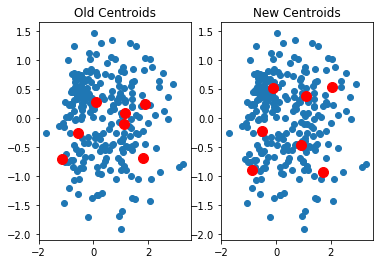

In [12]:
ax = plt.subplot(121)
ax.set_title("Old Centroids")
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)

ax = plt.subplot(122)
ax.set_title("New Centroids")
plt.scatter(points[:, 0], points[:, 1])
plt.scatter(new_centroids[:, 0], new_centroids[:, 1], c='r', s=100)

### Iteration

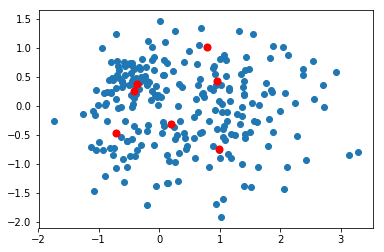

In [13]:
# init
plt.scatter(points[:, 0], points[:, 1])
centroids = initialize_centroids(points, 7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

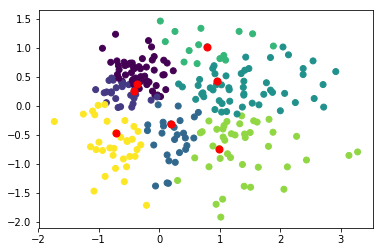

In [14]:
closest = closest_centroid(points, centroids)
plt.scatter(points[:, 0], points[:, 1], c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

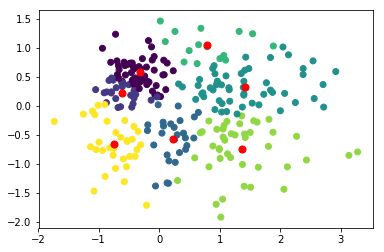

In [15]:
# run this block multiple times to get 'better' centroids

centroids = move_centroids(points, closest, centroids)
plt.scatter(points[:, 0], points[:, 1], c=closest)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)

### Animation

In [16]:
import ipywidgets
# jupyter nbextension enable --py --sys-prefix widgetsnbextension

In [17]:
# init
centroids = initialize_centroids(points, 7)
print(centroids)

[[ 1.33231989 -0.30648354]
 [ 0.23239978  0.60820659]
 [-0.50351673  0.36871186]
 [ 0.66821162  0.45797001]
 [ 0.0185521   1.46594488]
 [-0.62028683  0.40707517]
 [ 2.38000704  0.54300287]]


In [18]:
# iter
def f(x):
    global points, centroids, closest
    
    if x == 0: # print init points and random-selected starting points
        plt.scatter(points[:, 0], points[:, 1])
        plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)
        plt.show()
        print("print init points and random-selected starting points")
    elif x % 3 == 1: # color the points by the closest centroids
        closest = closest_centroid(points, centroids)
        plt.scatter(points[:, 0], points[:, 1], c=closest)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)
        plt.show()
        print("color the points by the closest centroids")
    elif x % 3 == 2: # show the color points only
        plt.scatter(points[:, 0], points[:, 1], c=closest)
        plt.show()
        print("show the color points only")
    else: # find the new centroids
        centroids = move_centroids(points, closest, centroids)
        plt.scatter(points[:, 0], points[:, 1], c=closest)
        plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=50)
        plt.show()
        print("find the new centroids")

In [19]:
# http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html

ipywidgets.interact(f, x = ipywidgets.FloatSlider(min = 0.0, max = 50.0, step = 1.0, value = 0.0))

<function __main__.f>

### Discussion (K-means and Hierarchical Clustering)

* K-means clustering needs the number of clusters to be speciﬁed.
* K-means assume that clusters have similar density.
* K-means is sensitive to outliers; K-means is sensitive to initial points and local optimal.
* K-means is linear in the number of data objects i.e., O(n), where n is the number of data objects. The time complexity of most of the hierarchical clustering algorithms is quadratic i.e., O(n^2).
* K-means works well when the shape of clusters are hyper-spherical  (or circular in 2 dimensions). If the natural clusters occurring in the dataset are non-spherical then probably K-means is not a good choice.
* K-means starts with a random choice of cluster centers, therefore it may yield different clustering results on different runs of the algorithm. Thus, the results may not be repeatable and lack consistency. However, with hierarchical clustering, you will most definitely get the same clustering results.
* Hierarchical Clustering can give diﬀerent partitionings depending on the level-of-resolution we are looking at.
* No clear consensus on which of the two produces better clustering.
* How the choose K?

### How to choose K?

In [20]:
# How the choose K?
# A) The number of data points in each cluster.

unique, counts = np.unique(closest, return_counts=True)
print(dict(zip(unique, counts)))

{0: 53, 1: 25, 2: 27, 3: 54, 4: 15, 5: 43, 6: 33}


In [21]:
# How the choose K?
# B) calculate avgWithinSS

In [22]:
import numpy as np
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# load the iris dataset
with open('iris.txt') as fp:
    X = np.loadtxt(fp)

##### cluster data into K=1..10 clusters #####
K = range(1,10)

# scipy.cluster.vq.kmeans
KM = [kmeans(X,k) for k in K]
centroids = [cent for (cent,var) in KM]   # cluster centroids
#avgWithinSS = [var for (cent,var) in KM] # mean within-cluster sum of squares

# alternative: scipy.spatial.distance.cdist
D_k = [cdist(X, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/X.shape[0] for d in dist]

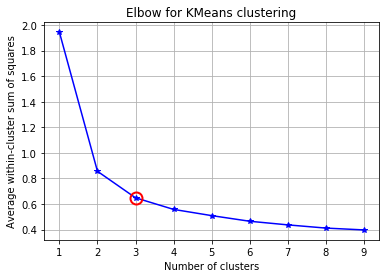

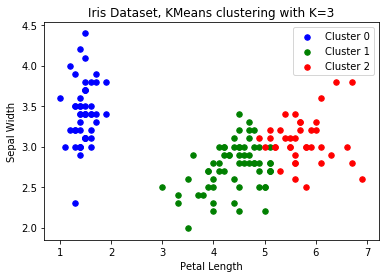

In [23]:
##### plot ###
kIdx = 2

# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
    markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

# scatter plot
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.scatter(X[:,2],X[:,1], s=30, c=cIdx[k])
clr = ['b','g','r','c','m','y','k']
for i in range(K[kIdx]):
    ind = (cIdx[kIdx]==i)
    ax.scatter(X[ind,2],X[ind,1], s=30, c=clr[i], label='Cluster %d'%i)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset, KMeans clustering with K=%d' % K[kIdx])
plt.legend()

plt.show()

### What else?

* **K-menas**: 新的中心點是使用該群集中全部資料點的平均中心。該平均中心多半是一個虛構出來的點，不在原資料集中。
* **K-mode**: 處理類別資料，使用類別的方式計算距離。
* **K-mediods**: 新的中心點是該群集的一個資料點，該點與其他資料點有最小的距離和。

Tip: You can perform PCA than k-means!

In [24]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

In [25]:
digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits(classes): %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

n_digits(classes): 10, 	 n_samples 1797, 	 n_features 64


In [26]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [27]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

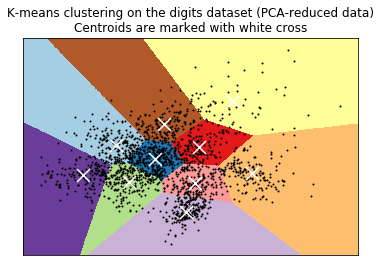

In [28]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()